In [ ]:
# simpy

# sympy
CAS  
MAthematica Software
pi
GP Pari first symbolic manipulation for large factorial
Solutions of PDE: Analytical, Serial(asymptotically, Perturbtaion)
Millanium problem
Scale factors
 

In [1]:
import sympy as sp
x= sp.symbols('x')
y= sp.sin(x)*sp.cos(x)
print(sp.simplify(y))  

sin(2*x)/2


In [3]:
# import sympy as sp
x = sp.symbols('x')
# y = sp.sin(x)*sp.cos(x)
y = sp.sin(x)*sp.cos(x)/sp.cos(x)**2
print(sp.trigsimp(y))

tan(x)


In [6]:
y= (x**2-4)/(x+2)
print(sp.factor(y))

x - 2


In [7]:
print(sp.solve(y)) # y=0,solve for x

[2]


In [8]:
A = sp.Matrix([[x**2,x**4],[sp.cos(x), 2*x]])
eig_v = A.eigenvals()
print(eig_v)

{x*(x + 2)/2 - x*sqrt(4*x*(x*cos(x) - 2) + (x + 2)**2)/2: 1, x*(x + 2)/2 + x*sqrt(4*x*(x*cos(x) - 2) + (x + 2)**2)/2: 1}


In [9]:
for i in eig_v:
    print(i)

x*(x + 2)/2 - x*sqrt(4*x*(x*cos(x) - 2) + (x + 2)**2)/2
x*(x + 2)/2 + x*sqrt(4*x*(x*cos(x) - 2) + (x + 2)**2)/2


In [10]:
V = A.eigenvects()
print(V)

[(x*(x + 2)/2 - x*sqrt(4*x*(x*cos(x) - 2) + (x + 2)**2)/2, 1, [Matrix([
[-2*x**3/(x + sqrt(4*x**2*cos(x) + x**2 - 4*x + 4) - 2)],
[                                                     1]])]), (x*(x + 2)/2 + x*sqrt(4*x*(x*cos(x) - 2) + (x + 2)**2)/2, 1, [Matrix([
[-2*x**3/(x - sqrt(4*x**2*cos(x) + x**2 - 4*x + 4) - 2)],
[                                                     1]])])]


## Summation

In [14]:
x,n = sp.symbols('x n')
# term = x**n
term =n
sum = sp.summation(term,(n,1,10))
print(sum)

55


## differentiation and Integration

In [33]:
y = sp.sin(x)

# y= x**3*sp.sin(x)+ 2*x +sp.cos(x)
y_dx = sp.diff(y,x)
print(y_dx)
y_dx2 = sp.diff(y,x,2)
print(y_dx2)
print(y_dx.subs(x,2.5))
print(sp.solve(y_dx)) # how to get in different intervals


cos(x)
-sin(x)
-0.801143615546934
[pi/2, 3*pi/2]


In [56]:
y = sp.sin(x)*x
# y_intg = sp.integrate(y,(x,0,sp.pi))
# print(y_intg.evalf(1000))
y_intg = sp.integrate(y,x)
y_intg

-x*cos(x) + sin(x)

## Differential Equation

In [55]:
x = sp.symbols('x')
y = sp.Function('y')(x)
diff_eq = sp.Eq(y.diff(x,x)+y,sp.sin(x))
bcs_1 = {y.subs(x,0):1, y.subs(x,sp.pi/2):0} # boundary conditions at x=0 and x=pi/2
sol = sp.dsolve(diff_eq,ics=bcs_1)
sol

Eq(y(x), (1 - x/2)*cos(x))

In [53]:
# SHM
t = sp.Symbol('t')
y = sp.Function('y')(t)
a, b = sp.symbols('a b')
diffeq = sp.Eq(y.diff(t,t)+a*y.diff(t)+ b*y,0)
bcs = {y.subs(t,0):6, y.diff(t).subs(t,0):0}
sol = sp.dsolve(diffeq,ics=bcs)
sol



Eq(y(t), (-3*a/sqrt(a**2 - 4*b) + 3)*exp(-t*(a + sqrt(a**2 - 4*b))/2) + (3*a/sqrt(a**2 - 4*b) + 3)*exp(t*(-a + sqrt(a**2 - 4*b))/2))

In [54]:
t = sp.Symbol('t')
y = sp.Function('y')(t)
diffeq = sp.Eq(y.diff(t),y/t) # y'=y/t
bcs ={y.subs(t,1):1}
solv =sp.dsolve(diffeq,ics=bcs)
solv

Eq(y(t), t)

In [65]:
import numpy as np
import matplotlib.pyplot as plt
y, mu, G, H = sp.symbols('y mu G H')
U = sp.Function('U')(y)
u_govern = sp.Eq(U.diff(y,y),G/mu)
bcs ={U.subs(y,0):0, U.subs(y,H):0}
sol = sp.dsolve(u_govern,ics=bcs)
sol
u_val = sol.rhs
given ={ 'G':-0.05, 'H':0.1, 'mu':0.001}
u_v = u_val.subs(given)
u_num = sp.lambdify(y,u_v,'numpy')
y_val = np.linspace(0,0.1,100)
u_val = u_num(y_val)
print(u_num(0.05))

0.062499999999999986


Text(0.5, 1.0, 'Velocity profile')

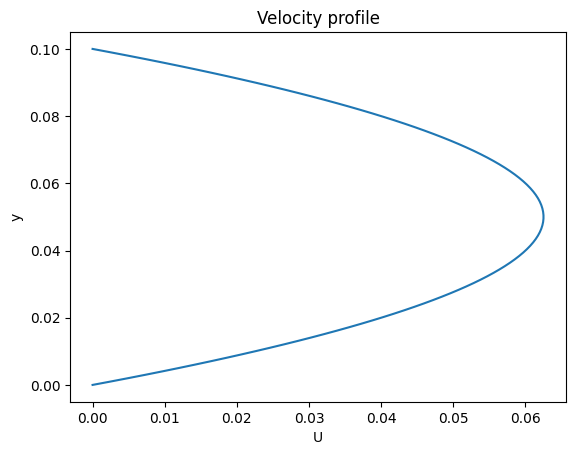

In [70]:
plt.plot(u_val,y_val)
plt.xlabel('U')
plt.ylabel('y')
plt.title('Velocity profile')

In [88]:
# one D heat transfer along a fin
x, m, L, T0, k, A= sp.symbols('x m L T0 k A')
T = sp.Function('T')(x)
diffeq = sp.Eq(T.diff(x,x)-(m**2)*T,0) 
bcs = {T.diff(x).subs(x, L): 0,T.subs(x,0):T0}
solv = sp.dsolve(diffeq, ics=bcs)
solv
Tht = solv.rhs
Q = -k*A*sp.diff(Tht,x)
Q_h = sp.simplify(Q)
Q_b = Q_h.subs(x,0)
sp.simplify(Q_b)

A*T0*k*m*tanh(L*m)